<center><h1>Violencia Intrafamiliar</h1></center>

### 1. Contexto y motivación

<p> En el último tiempo en Chile se puede ver en los distintos medios de comunicación, ya sea noticias, redes sociales, etc, un aumento considerable en casos de homicidio y violencia hacia la mujer, muchos de estos casos suelen ser provocados por familiares, parejas hacia las víctimas, por lo que nos llamó la atención el poder analizar la relación entre estos casos de violencia y poder sacar datos en común o patrones acerca de estos</p>

### 2. Objetivos

Como grupo nos planteamos de objetivo el poder encontrar las correlaciones entre los distintos casos de violencia ejercidos hacia la mujer, y así obtener distintos patrones que se generan entre estos.

Nuestra intención es poder comparar estos datos, para poder obtener información sobre el aumento o decrecimiento de los casos de violencia a la mujer antes de la cuarentena, durante y después de esta.

### 3. Datos

El archivo extraído de la página cead.spd.gov, tratan sobre encuestas realizadas a mujeres que han sufrido de violencia, aquí se realizan preguntas directamente para obtener información de la persona (cuál es su nacionalidad, rango etario entre otros) proporciona información respecto a lo que vivió la mujer, y cómo afronta la situación a día de hoy, junto con algunos datos de características que tenía su pareja

### 4. Preguntas de investigación:

In [ ]:
#Instalar librerias utilizadas en el proyecto
#!pip install kmodes 

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree 

In [2]:
data_vif = pd.read_spss('Datasets/principal-encuestas/VIF_Final.sav')
data_vif.head()

,NIVEL_EDUCACION,OCUPACION,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VIOLENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,...,ABUSOS_SEXUAL_FAMI,RANGO_ETARIO,GRUPO_SOCIOECONOMICO,PERSONAS_EN_HOGAR,ADULTOS_EN_HOGAR,AGRESION,MESES_SIN_TRABAJO,MESES_PAREJA_ACTUAL,MESES_EX_PAREJA,MESES_CONVIVENCIA_EX_PAREJA
0,6.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,4.0,3.0,7.0,7.0,1.0,0.0,0.0,144.0,144.0
1,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,4.0,2.0,1.0,1.0,0.0,66.0,66.0
2,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,3.0,2.0,2.0,9.0,1.0,0.0,12.0,12.0
3,11.0,8.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,4.0,1.0,2.0,2.0,9.0,0.0,0.0,36.0,0.0
4,8.0,10.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,...,2.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,36.0,36.0


In [3]:
data_estado_laboral = pd.read_spss("Datasets/E.laboral/laboral_final.sav")
data_estado_laboral.head()

,SEXO,EDAD,PARENTESCO,CURSO,REGION,NIVEL,TERMINO_NIVEL,EST_CONYUGAL,PROVEEDOR
0,2.0,56.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0
1,2.0,89.0,8.0,3.0,1.0,3.0,2.0,4.0,3.0
2,2.0,50.0,1.0,5.0,1.0,9.0,1.0,1.0,2.0
3,2.0,27.0,4.0,2.0,1.0,16.0,1.0,3.0,3.0
4,2.0,4.0,6.0,0.0,1.0,0.0,2.0,0.0,3.0


In [4]:
data_ingresos = pd.read_spss("Datasets/ingresos/Ingresos_Final.sav")

In [5]:
data_ingresos.head()

,SEXO,EDAD,PARENTESCO,NACIONALIDAD,NIVEL,PROVEEDOR,CAE_ESPECIFICO,CATEGORIA_OCUPACION,CODIGO_REGION,CODIGO_COMUNA,TIPO_ESTRATO_HOGAR,MONTO_HOGAR
0,2.0,29.0,2.0,862.0,8.0,0.0,1.0,3.0,8.0,8108.0,1.0,6.408423e+05
1,2.0,30.0,7.0,152.0,9.0,0.0,1.0,4.0,13.0,13103.0,1.0,1.500000e+06
2,2.0,43.0,1.0,152.0,9.0,1.0,1.0,3.0,10.0,10301.0,1.0,2.073150e+06
3,2.0,15.0,4.0,152.0,4.0,0.0,15.0,0.0,2.0,2101.0,1.0,1.081732e+05
4,2.0,62.0,8.0,152.0,4.0,0.0,19.0,0.0,2.0,2201.0,1.0,1.400000e+05


- ¿En qué zona del país se da más la violencia hacia la mujer, infiere el nivel socioeconómico de la región?

In [6]:
ing_reg = data_ingresos.groupby(by = ['CODIGO_REGION', 'TIPO_ESTRATO_HOGAR']).mean().reset_index().loc[:, ['CODIGO_REGION', 'TIPO_ESTRATO_HOGAR','MONTO_HOGAR']]
ing_reg.head(10)

,CODIGO_REGION,TIPO_ESTRATO_HOGAR,MONTO_HOGAR
0,1.0,1.0,699793.722734
1,1.0,2.0,562366.152481
2,1.0,3.0,303185.049039
3,2.0,1.0,823886.402463
4,2.0,2.0,519739.806879
5,2.0,3.0,322515.675960
6,3.0,1.0,576637.442304
7,3.0,2.0,522230.673751
8,3.0,3.0,472123.366926
9,4.0,1.0,580111.977331


Como primer paso se analizan las columnas relevantes una a una, para poder hacer un Count de respuestas y así sacar alguna relación correspondiente a cada una

### Ingresos promedio de hogares por region

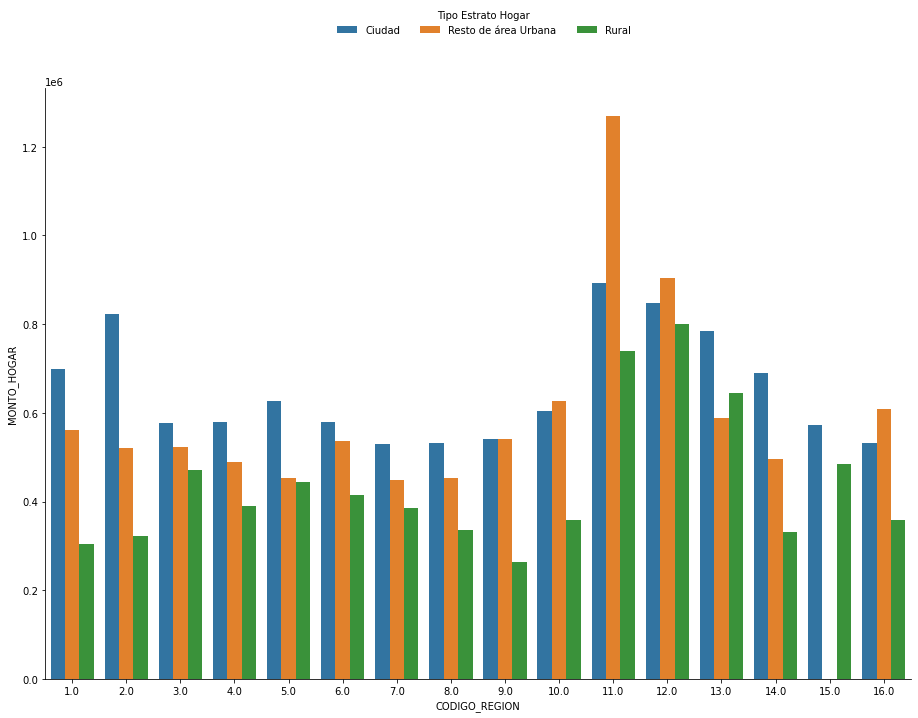

In [7]:
sns.color_palette()
ax = sns.catplot(y = 'MONTO_HOGAR', x ='CODIGO_REGION',hue='TIPO_ESTRATO_HOGAR', data= ing_reg, kind='bar')
ax.fig.set_figwidth(20)
ax.fig.set_figheight(10)

ax._legend.set_title('Tipo Estrato Hogar')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.44, 1), ncol=3, title= 'Tipo Estrato Hogar', frameon=False)
for t, l in zip(ax._legend.texts, ['Ciudad', 'Resto de área Urbana', 'Rural']):
    t.set_text(l)
    
plt.show()

In [8]:
cols = ['VIOLENCIA_PUBLICA',
           'VIOLENCIA_PUBLICA_NINEZ', 'VIOLENCIA_PUBLICA_VIDA',
           'VIOLENCIA_LABORAL_ANIO', 'VIOLENCIA_LABORAL_NINEZ',
           'VIOLENCIA_LABORAL_VIDA','VIOLENCIA_ECONOMICA', 'DEPENDENCIA_ECONOMICA']

data_vif[cols].head()

,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VIOLENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_ECONOMICA,DEPENDENCIA_ECONOMICA
0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0
1,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
2,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0
3,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0
4,2.0,2.0,2.0,1.0,2.0,1.0,2.0,0.0


- ## Violencia pública

Los datos en general indican que en la Región Metropolitana es donde mas las mujeres pueden ser o han sido violentadas en el ámbito laboral/ publico.

En ámbitos de violencia pública, para los tres grupos sociales es relativamente similar, a excepción de la columna VIOLENCIA_PUBLICA_VIDA donde se puede notar como el grupo social 1 (Alto), es el que menos a pasado por este tipo de violencia, hablando en un aspecto general de su vida.

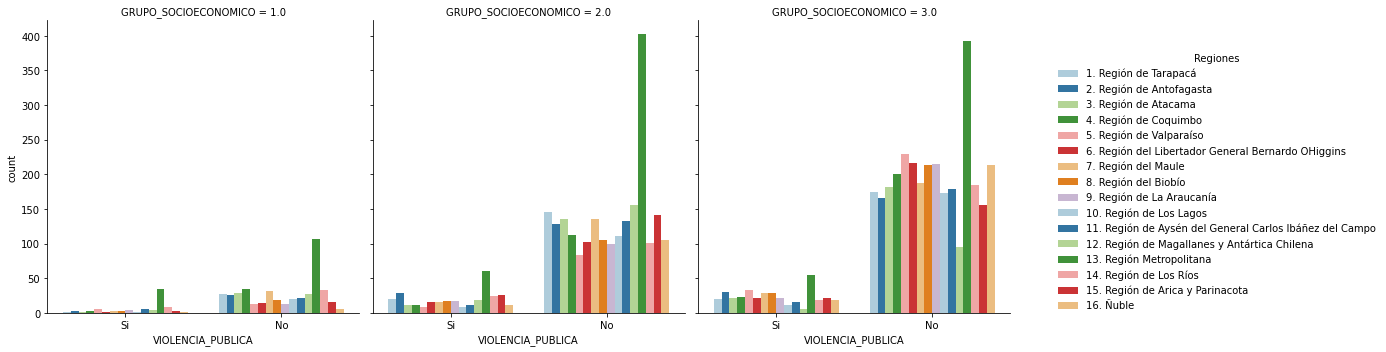

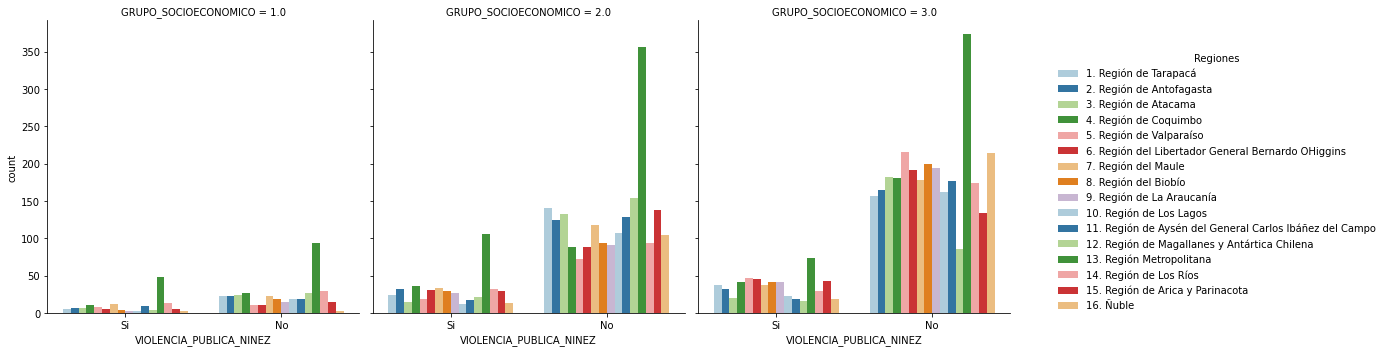

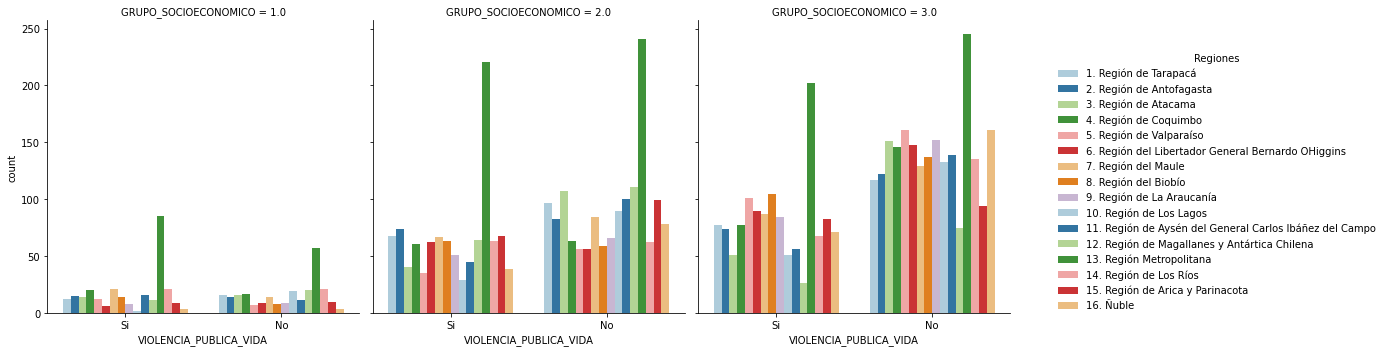

In [9]:

regiones = ['1. Región de Tarapacá', '2. Región de Antofagasta', '3. Región de Atacama', '4. Región de Coquimbo', '5. Región de Valparaíso', '6. Región del Libertador General Bernardo O''Higgins', 
          '7. Región del Maule', '8. Región del Biobío', '9. Región de La Araucanía', '10. Región de Los Lagos', '11. Región de Aysén del General Carlos Ibáñez del Campo', 
          '12. Región de Magallanes y Antártica Chilena', '13. Región Metropolitana', '14. Región de Los Ríos', '15. Región de Arica y Parinacota', '16. Ñuble']

for i in cols[0:3]:
    ax =  sns.catplot(x= i, hue= 'REG_REC', col = 'GRUPO_SOCIOECONOMICO' , kind="count", data = data_vif, palette = sns.color_palette("Paired", 9))
    ax.fig.set_figwidth(15)
    ax.fig.set_figheight(5)
    sns.move_legend(ax, "lower center", bbox_to_anchor=(1.13, .1), ncol=1, title= 'Regiones', frameon=False)
    ax.set_xticklabels(['Si', 'No'])
    for t, l in zip(ax._legend.texts, regiones):
            t.set_text(l)

- ## Violencia laboral

Directamente hablando en el ámbito laboral, si bien se puede notar que en la mayoría de regiones las respuestas fueron no, se nota un leve cambio para el grupo social 3 (Bajo), denotando que para las clases sociales mas bajas la violencia en el ámbito laboral esta mas presente aun que sea en cantidad baja.


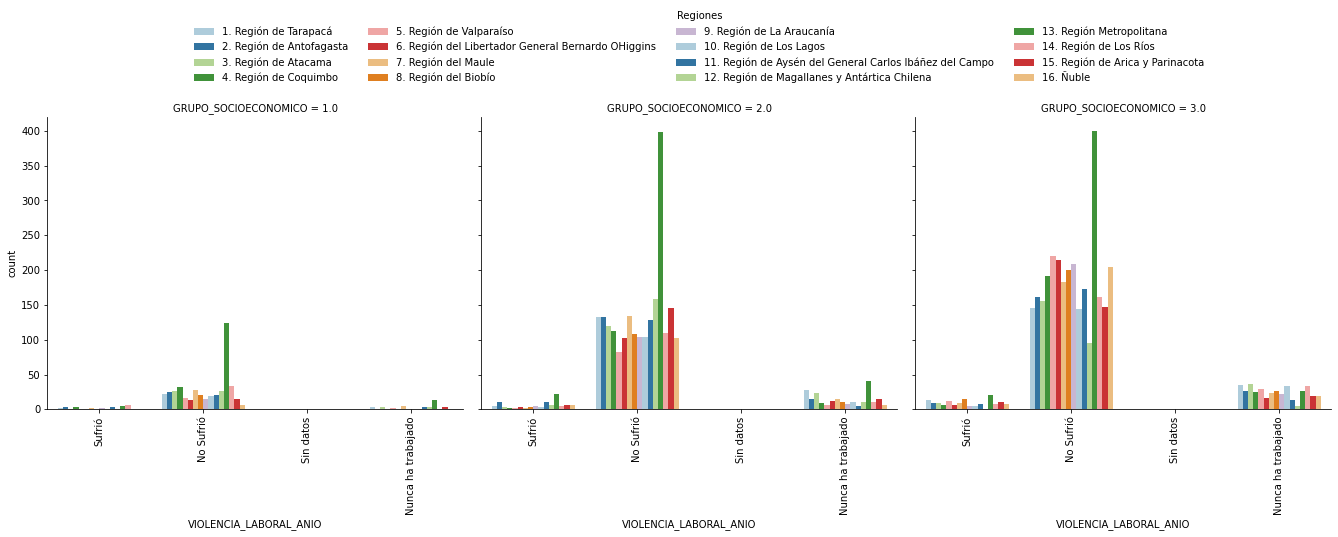

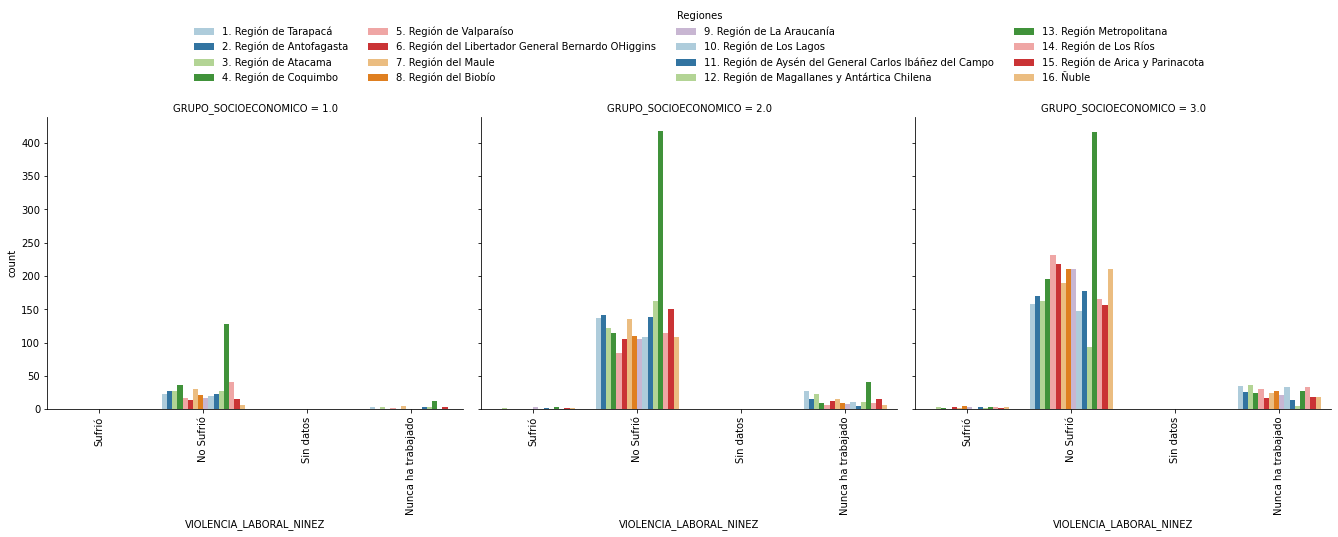

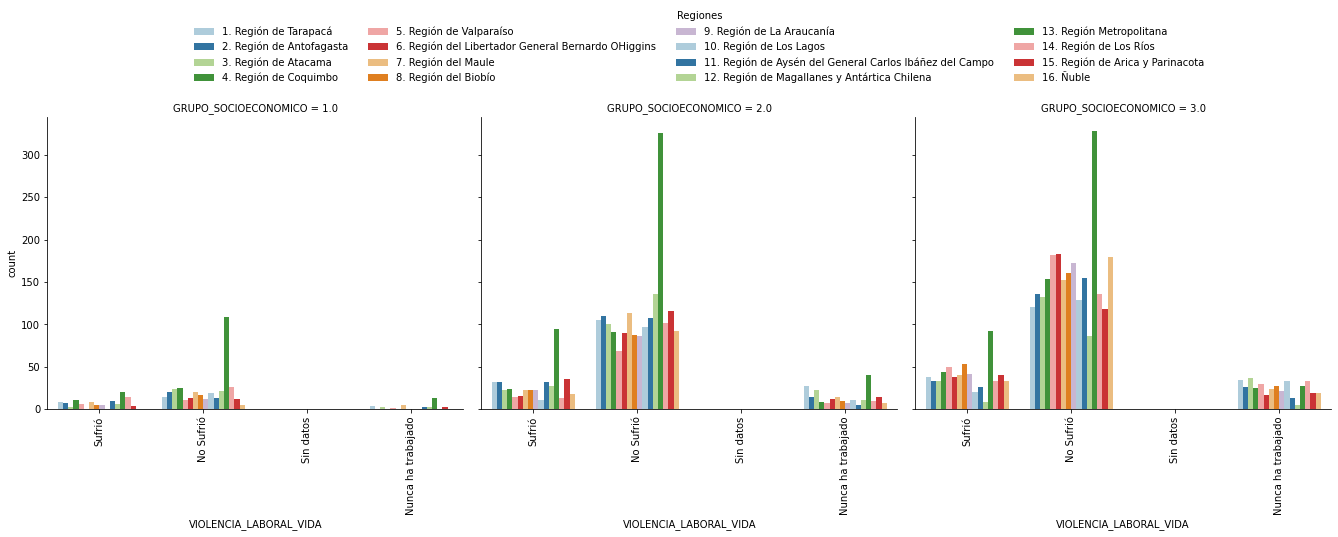

In [10]:
for i in cols[3:6]:
    ax =  sns.catplot(x= i, hue= 'REG_REC', col = 'GRUPO_SOCIOECONOMICO' , kind="count", data = data_vif, palette = sns.color_palette("Paired", 9))
    ax.fig.set_figwidth(20)
    ax.fig.set_figheight(5)
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title= 'Regiones', frameon=False)
    ax.set_xticklabels(['Sufrió', 'No Sufrió', 'Sin datos', 'Nunca ha trabajado'], rotation=90)
    for t, l in zip(ax._legend.texts, regiones):
            t.set_text(l)

- ## Violencia economica

Al igual que el caso anterior se puede notar que la violencia económica como tal la han sufrido mas los grupos sociales 3 y 2 (Baja, Media), siendo las respuestas del grupo 1 (Alta)prácticamente en su totalidad No. Como ultimo notar que los grupos 3 y 2 también son las que mas dependencia económica tienen.

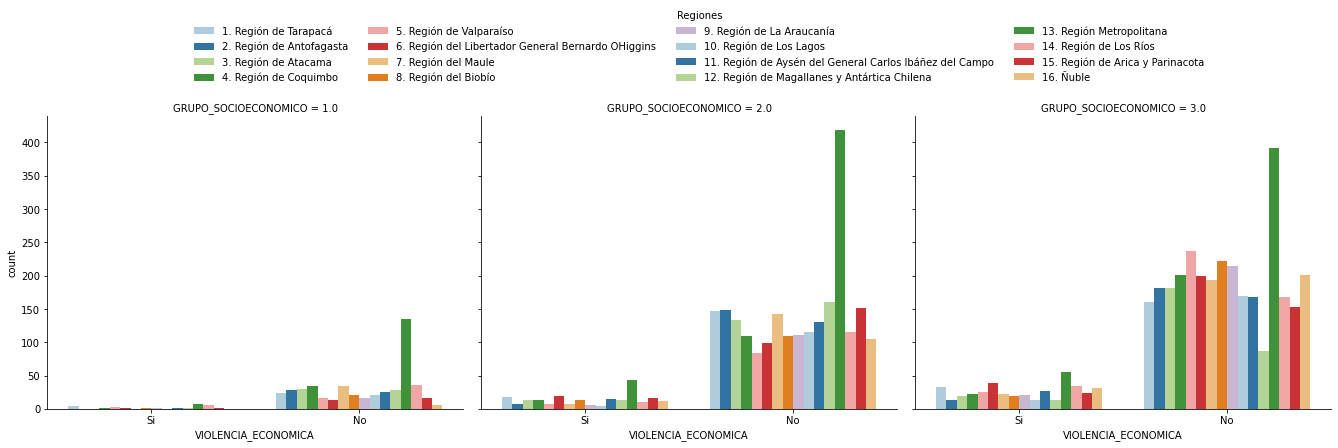

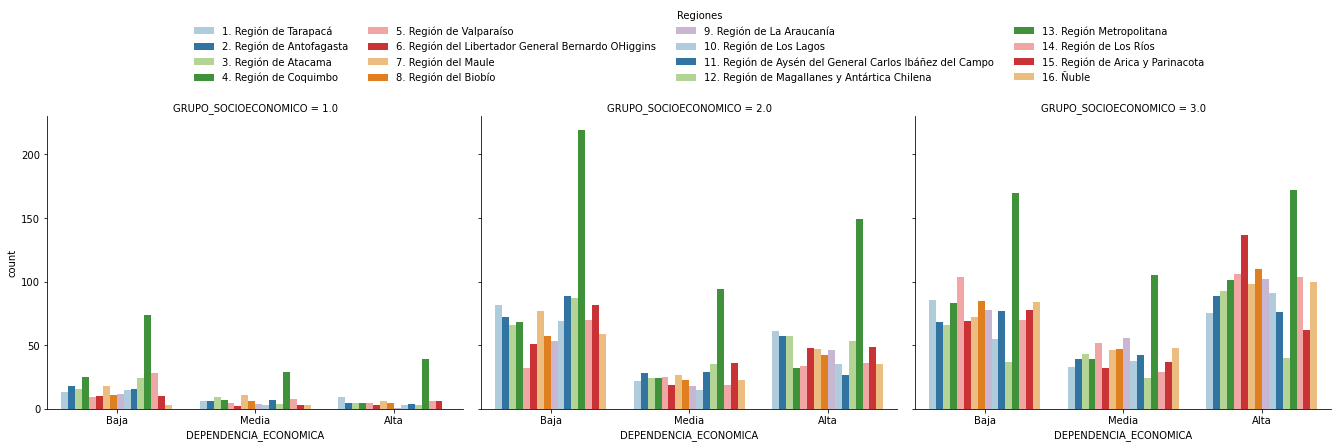

In [11]:
for i in cols[6:]:
    ax =  sns.catplot(x= i, hue= 'REG_REC', col = 'GRUPO_SOCIOECONOMICO' , kind="count", data = data_vif, palette = sns.color_palette("Paired", 9))
    ax.fig.set_figwidth(20)
    ax.fig.set_figheight(5)
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title= 'Regiones', frameon=False)

    if i == 'VIOLENCIA_ECONOMICA' :
        ax.set_xticklabels(['Si', 'No'])
    else:
        ax.set_xticklabels(['Baja', 'Media', 'Alta'])
        
    for t, l in zip(ax._legend.texts, regiones):
            t.set_text(l)

Los datos en general indican que en la Región Metropolitana es donde mas las mujeres pueden ser o han sido violentadas en el ámbito laboral/ publico. Esta región de igual forma es la que posee los ingresos mas altos en zonas de ciudad, siendo superada por  la Región de Aysén del General Carlos Ibáñez del Campo (11) en zonas cercanas a la ciudad y por la Región de Magallanes y Antártica Chilena (12)en zonas rurales. 


SI analizamos la Región de Aysén del General Carlos Ibáñez del Campo (11), y comparamos esto con el resto de gráficos obtenido de la encuesta, Aysén no esta dentro de los valores mas altos donde mas presente violencia, económica/ laboral, a diferencia de Valparaíso que para este tipo de zonas tiene uno de los ingresos mas bajos, y si analizamos se aprecia que en todos los gráficos esta un poco mas alto que Aysén. Lo mismo pasando para Magallanes y La Araucanía, donde Magallanes tiene los ingresos mas altos en zonas rurales y La Araucanía los mas bajos , donde lo valores para casi toda la encuesta son muy bajos, pero esto también se puede deber a la cantidad de avientes por región

- ¿Que edades son más propensas a informar respecto a la violencia que han sufrido?

In [12]:
df_rangos_etarios = data_vif.RANGO_ETARIO.value_counts().reset_index().rename(columns = {'index': 'RANGO_ETARIO', 'RANGO_ETARIO' : 'VALUE_COUNTS'}).sort_values(by='VALUE_COUNTS', ascending=False)
df_rangos_etarios

,RANGO_ETARIO,VALUE_COUNTS
0,6.0,1489
1,5.0,1279
2,3.0,1177
3,4.0,1151
4,7.0,702
5,2.0,624
6,1.0,148


Vemos eventualmente cual es la moda dentro del rango etario

In [13]:
print(f'La moda del rango etario es: {data_vif.RANGO_ETARIO.mode()[0]}')

La moda del rango etario es: 6.0


Utilizamos la moda, debido a que esta representa el valor que se encuentra con mayor frecuencia en un conjunto de datos, en este caso es el 6, esta opcion corresponde al rango etario 56 a 65 años

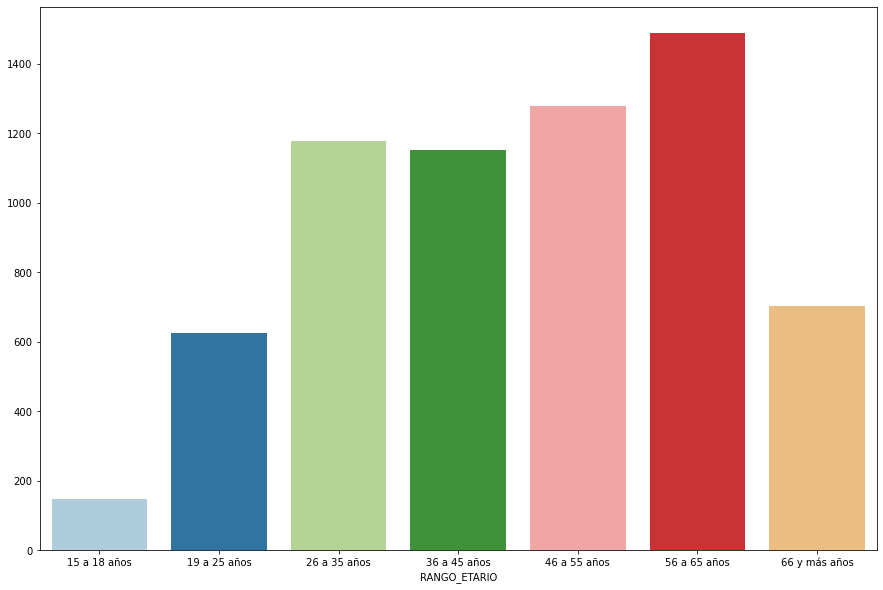

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x = "RANGO_ETARIO", y = "VALUE_COUNTS", data = df_rangos_etarios, palette=sns.color_palette("Paired", 9))

ax.set(ylabel='')
ax.set_xticklabels(['15 a 18 años', '19 a 25 años','26 a 35 años','36 a 45 años','46 a 55 años','56 a 65 años','66 y más años'])
plt.show()

Podemos ver que a medida que aumenta la edad, aumenta la cantidad de victimas que dan a conocer su casos, esto puede ser causado por el hecho de que cuando son jovenes, puede que no sientan tanta seguridad en dar a conocer su problema, ya sea porque les da miedo, o hasta la persona la cual les genero el daño la puede estar amenazando  

#### **3.- ¿Qué mujeres sufren más violencia intrafamiliar, las que tienen parejas de su mismo sexo o parejas de sexo opuesto? y en que estado civil se encuentran estas personas?** 

In [15]:
df_sexualidad = data_vif.SEXUALIDAD.value_counts().reset_index().rename(columns = {'index': 'SEXUALIDAD', 'SEXUALIDAD' : 'VALUE_COUNTS'}).sort_values(by='VALUE_COUNTS', ascending=False)
df_sexualidad

,SEXUALIDAD,VALUE_COUNTS
0,1.0,6482
1,3.0,39
2,2.0,37
3,8.0,6
4,9.0,4
5,4.0,2


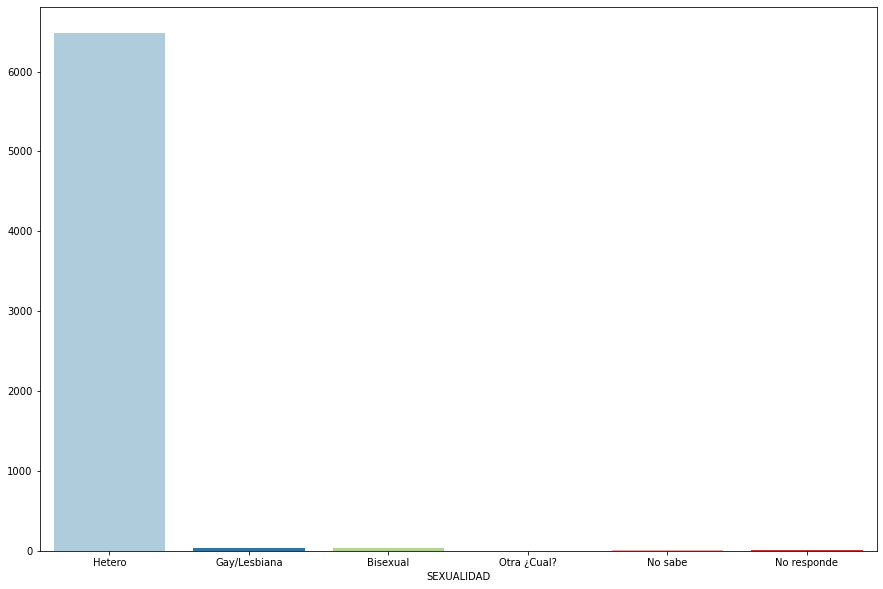

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x = "SEXUALIDAD", y = "VALUE_COUNTS", data = df_sexualidad, palette = sns.color_palette("Paired", 9))
ax.set(ylabel='')
ax.set_xticklabels(['Hetero', 'Gay/Lesbiana','Bisexual','Otra ¿Cual?','No sabe','No responde'])
plt.show()

**Podemos ver que no existe una proporcionalidad entre las diferentes tipo de relaciones, siendo por lejos las relaciones heterosexuales, las que por por mucho presentan el hecho de que se genere violencia dentro de la pareja, además a continuacion veremos en que estado civil, estos casos se vuelven más frecuentes**

In [17]:
df_estado_civil = data_vif.ESTADO_CIVIL.value_counts().reset_index().rename(columns = {'index': 'ESTADO_CIVIL', 'ESTADO_CIVIL' : 'VALUE_COUNTS'}).sort_values(by='VALUE_COUNTS', ascending=False) 
df_estado_civil

,ESTADO_CIVIL,VALUE_COUNTS
0,7.0,2730
1,1.0,2654
2,6.0,439
3,4.0,356
4,5.0,345
5,2.0,29
6,3.0,13
7,8.0,3
8,9.0,1


**Vemos que las opciones 7 y 1 predominan dentro del esquema general, estas opciones corresponden a Soltera y Casada, respectivamente**

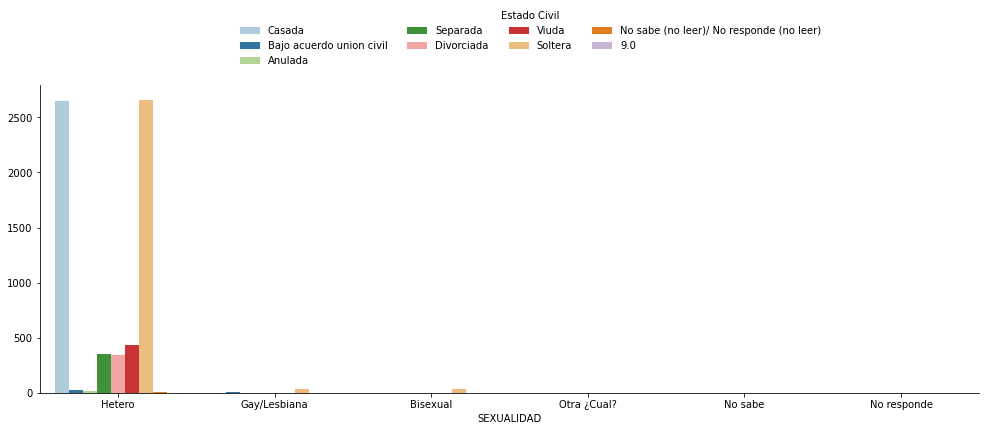

In [18]:
ax =  sns.catplot(x= 'SEXUALIDAD', hue= 'ESTADO_CIVIL', kind="count", data = data_vif, palette = sns.color_palette("Paired", 9))
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title= 'Estado Civil', frameon=False)
ax.set(ylabel='')
ax.set_xticklabels(['Hetero', 'Gay/Lesbiana','Bisexual','Otra ¿Cual?','No sabe','No responde'])
for t, l in zip(ax._legend.texts, ['Casada', 'Bajo acuerdo union civil', 'Anulada', 'Separada', 'Divorciada', 'Viuda', 'Soltera', 'No sabe (no leer)/ No responde (no leer)']):
    t.set_text(l)

**Como mencionamos antes, las relaciones heterosexuales predominan en el ambito de la violencia intrafamiliar, y podemos ver que la violencia predomina entre las personas casadas y solteras, siendo estas ultimas donde se da un poco más la situacion de violencia** <br>
**Además que si vemos las otras tipo de horientaciones sexuales, veremos que de igual forma el estar soltero aumenta la probabilidad de sufrir violencia**

- ¿Cuáles son las características principales que llevan a la violencia de la mujer?

In [19]:
# haremos una cola columna de si/no entonces si se´ra si la persona sufrio algun
#  tipo de violencia y no es que no sufrio de ninguna
cols = ['VIOLENCIA_PUBLICA',
        'VIOLENCIA_PUBLICA_NINEZ',
        'VIOLENCIA_PUBLICA_VIDA' ,
        'VIOLENCIA_LABORAL_ANIO',
        'VIOLENCIA_LABORAL_NINEZ',
        'VIOLENCIA_LABORAL_VIDA',
        'VIOLENCIA_EDUCATIVO_ANIO',
        'VIOLENCIA_EDUCATIVO_NINEZ',
        'VIOLENCIA_EDUCATIVO_VIDA', 
        'VIOLENCIA_PSICOLOGICA_LEVE_ANIO',
        'VIOLENCIA_PSICOLOGICA_GRAVE_ANIO',
        'VIOLENCIA_PSICOLOGICA_GENERAL_ANIO',
        'VIOLENCIA_FISICA_LEVE_ANIO',
        'VIOLENCIA_FISICA_GRAVE_ANIO',
        'VIOLENCIA_FISICA_GENERAL_ANIO',
        'VIOLENCIA_SEXUAL_ANIO',
        'VIOLENCIA_SEXUAL_VIDA',
        'VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO',
        'VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA', 
        'VIOLENCIA_ECONOMICA',
        'DELITOS_SEXUALES_NINEZ', 
        'VIOLENCIA_ADULTEZ']

data_agresion = data_vif[cols].astype(int)
data_agresion = data_agresion[cols].astype(str)
data_agresion['RESPUESTAS'] = data_agresion[cols].apply(''.join, axis=1)


data_agresion['AGRESION'] = np.where(data_agresion['RESPUESTAS'].str.contains('1'), '1' , '2') 
data_agresion.head()

,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VIOLENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,VIOLENCIA_EDUCATIVO_VIDA,VIOLENCIA_PSICOLOGICA_LEVE_ANIO,...,VIOLENCIA_FISICA_GENERAL_ANIO,VIOLENCIA_SEXUAL_ANIO,VIOLENCIA_SEXUAL_VIDA,VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO,VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA,VIOLENCIA_ECONOMICA,DELITOS_SEXUALES_NINEZ,VIOLENCIA_ADULTEZ,RESPUESTAS,AGRESION
0,2,2,1,2,2,2,2,2,2,2,...,1,2,1,1,1,2,2,2,2212222222222112111222,1
1,2,2,2,2,2,2,2,2,2,1,...,2,1,1,1,1,1,2,2,2222222221112221111122,1
2,2,1,1,2,2,2,2,2,2,2,...,2,1,1,1,1,2,1,2,2112222222222221111212,1
3,2,1,1,2,2,2,2,2,2,2,...,2,2,2,2,1,2,1,2,2112222222222222221212,1
4,2,2,2,1,2,1,2,2,2,1,...,2,2,1,1,1,2,2,2,2221212221212222111222,1


In [20]:
#haremos un sub data para realizar nuestro arbol será poder saber cuales son las columnas/caracteristicas
#  mas influyentes en "agresión"
data = data_agresion.copy()

# borraremos estas columnas ya que ya estan representadas en "agresión"
data = data_vif.drop(columns = ['VIOLENCIA_PUBLICA',
                               'VIOLENCIA_PUBLICA_NINEZ',
                               'VIOLENCIA_PUBLICA_VIDA' ,
                               'VIOLENCIA_LABORAL_ANIO',
                               'VIOLENCIA_LABORAL_NINEZ',
                               'VIOLENCIA_LABORAL_VIDA',
                               'VIOLENCIA_EDUCATIVO_ANIO',
                               'VIOLENCIA_EDUCATIVO_NINEZ',
                               'VIOLENCIA_EDUCATIVO_VIDA', 
                               'VIOLENCIA_PSICOLOGICA_LEVE_ANIO',
                               'VIOLENCIA_PSICOLOGICA_GRAVE_ANIO',
                               'VIOLENCIA_PSICOLOGICA_GENERAL_ANIO',
                               'VIOLENCIA_FISICA_LEVE_ANIO',
                               'VIOLENCIA_FISICA_GRAVE_ANIO',
                               'VIOLENCIA_FISICA_GENERAL_ANIO',
                               'VIOLENCIA_SEXUAL_ANIO',
                               'VIOLENCIA_SEXUAL_VIDA',
                               'VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO',
                               'VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA', 
                               'VIOLENCIA_ECONOMICA',
                               'DELITOS_SEXUALES_NINEZ', 
                               'VIOLENCIA_ADULTEZ'])

# separamos para poder 
# obtener datos de test y prueba de x e y.
y = data.AGRESION
X = data.loc[:, ~data.columns.isin(['AGRESION'])]

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3)
lista = [i for i in range(1,33)]

# queremos los mejores valores para un buen arbol de 
# desicion  por lo que cuparemos GridSearchCV para optimizar 
dec_tree_grid_cv = GridSearchCV(DecisionTreeClassifier(),
                                {'max_depth' : lista,
                                 'max_features' : list(range( 1 ,X_train.shape[1]))},
                                cv= 5 , n_jobs= -1)

#ajustamos a los datos de entrenamiento
arbol = dec_tree_grid_cv.fit(X_train, y_train)

#predecimos las categorías para el dataset de prueba
y_pred_test = dec_tree_grid_cv.predict(X_test)

# ajustamos con los valores parecidos a los encontrados con arbol.best_estimator_
dec_tree_grid = DecisionTreeClassifier(max_depth = 3, max_features = 17 )
arbol_ = dec_tree_grid.fit(X_train, y_train)
y_pred_test = dec_tree_grid.predict(X_test)

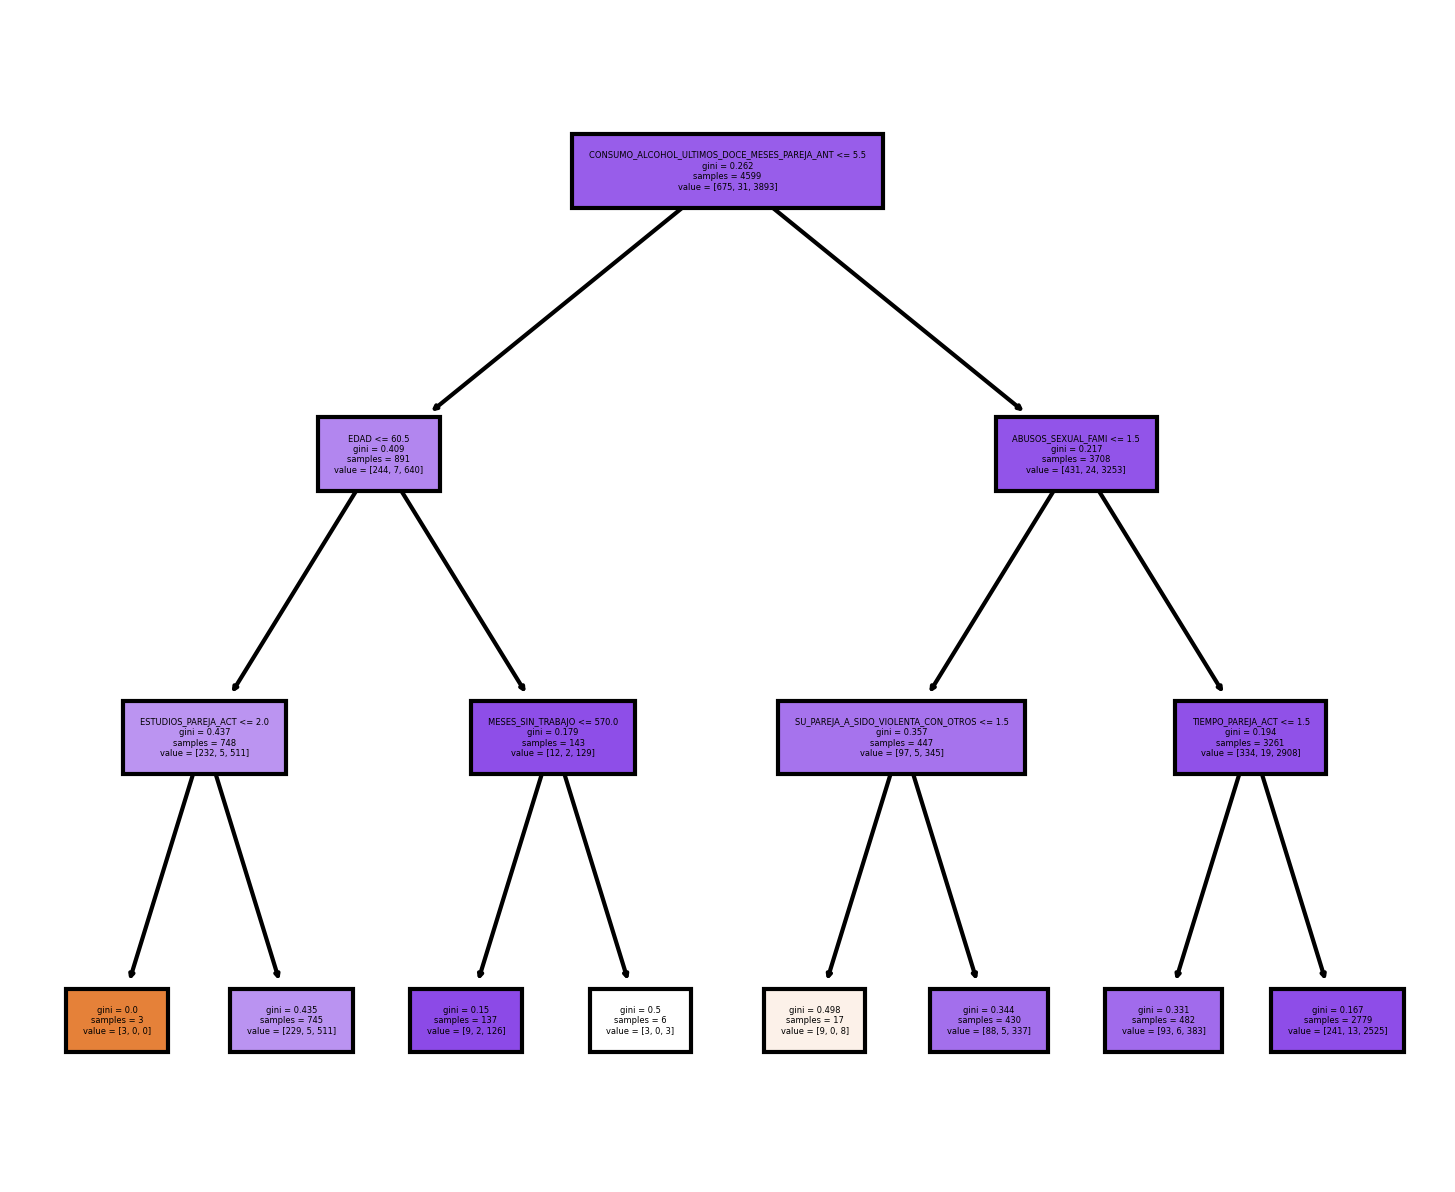

In [21]:
# graficamos el árbol
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,5), dpi=300)
tree.plot_tree(arbol_, filled=True, feature_names = X.columns,fontsize=2);

- ¿Cuales son los pensamientos y/o ideas más frecuentes entre las mujeres que sufre y las que no sufren VIF?

In [23]:
cols = ['VIOLENCIA_PUBLICA',
        'VIOLENCIA_PUBLICA_NINEZ',
        'VIOLENCIA_PUBLICA_VIDA' ,
        'VIOLENCIA_LABORAL_ANIO',
        'VIOLENCIA_LABORAL_NINEZ',
        'VIOLENCIA_LABORAL_VIDA',
        'VIOLENCIA_EDUCATIVO_ANIO',
        'VIOLENCIA_EDUCATIVO_NINEZ',
        'VIOLENCIA_EDUCATIVO_VIDA', 
        'VIOLENCIA_PSICOLOGICA_LEVE_ANIO',
        'VIOLENCIA_PSICOLOGICA_GRAVE_ANIO',
        'VIOLENCIA_PSICOLOGICA_GENERAL_ANIO',
        'VIOLENCIA_FISICA_LEVE_ANIO',
        'VIOLENCIA_FISICA_GRAVE_ANIO',
        'VIOLENCIA_FISICA_GENERAL_ANIO',
        'VIOLENCIA_SEXUAL_ANIO',
        'VIOLENCIA_SEXUAL_VIDA',
        'VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO',
        'VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA', 
        'VIOLENCIA_ECONOMICA',
        'DELITOS_SEXUALES_NINEZ', 
        'VIOLENCIA_ADULTEZ']

data_violencia = data_vif[cols].astype(int)
data_violencia = data_violencia[cols].astype(str)
data_violencia['VIOLENCIA'] = data_violencia[cols].apply(''.join, axis=1)

In [24]:
data_violencia = pd.concat([data_vif[['AFIRMA_HOMBRE_JEFE',
                                        'HOMBRE_DEBE_RESP_GASTOS_HOGAR',
                                        'MUJER_ACARGO_HIJOS',
                                        'MUJER_REALIZAR_QUEHACERES',
                                        'MUJER_NO_CONTRA_OP',
                                        'MUJER_PART_SINAPROB',
                                        'MUJER_ESCOGER_AMIGOS',
                                        'VEST_APROBADA',
                                        'RELACIONES_OBLIGADA',
                                        'VESTIRSE_X_NO_ACOSO',
                                        'MALTRATO_X_BIEN_FAMILIA',
                                        'MALTRATO_SE_RESUELVE_EN_CASA',
                                        'MALTRATO_X_INFIDELIDAD',
                                         'RANGO_ETARIO']], data_violencia[['VIOLENCIA']]], axis = 1)

data_violencia['SUFRE_O_SUFRIO_VIOLENCIA'] = np.where(data_violencia['VIOLENCIA'].str.contains('1'),1 , 2) 
data_violencia.head()

,AFIRMA_HOMBRE_JEFE,HOMBRE_DEBE_RESP_GASTOS_HOGAR,MUJER_ACARGO_HIJOS,MUJER_REALIZAR_QUEHACERES,MUJER_NO_CONTRA_OP,MUJER_PART_SINAPROB,MUJER_ESCOGER_AMIGOS,VEST_APROBADA,RELACIONES_OBLIGADA,VESTIRSE_X_NO_ACOSO,MALTRATO_X_BIEN_FAMILIA,MALTRATO_SE_RESUELVE_EN_CASA,MALTRATO_X_INFIDELIDAD,RANGO_ETARIO,VIOLENCIA,SUFRE_O_SUFRIO_VIOLENCIA
0,1.0,2.0,2.0,1.0,1.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,2212222222222112111222,1
1,3.0,4.0,4.0,1.0,2.0,5.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2222222221112221111122,1
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2112222222222221111212,1
3,1.0,1.0,2.0,3.0,1.0,5.0,4.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,2112222222222222221212,1
4,1.0,3.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,4.0,1.0,3.0,2221212221212222111222,1


En el siguiente gráfico se puede visualizar que en general las mujeres están en desacuerdo en que el hombre sea reconocido con el cargo de jefe del hogar, llevandose la mayor predominancia en las mujeres que sufren o sufrieron algún tipo de violencia

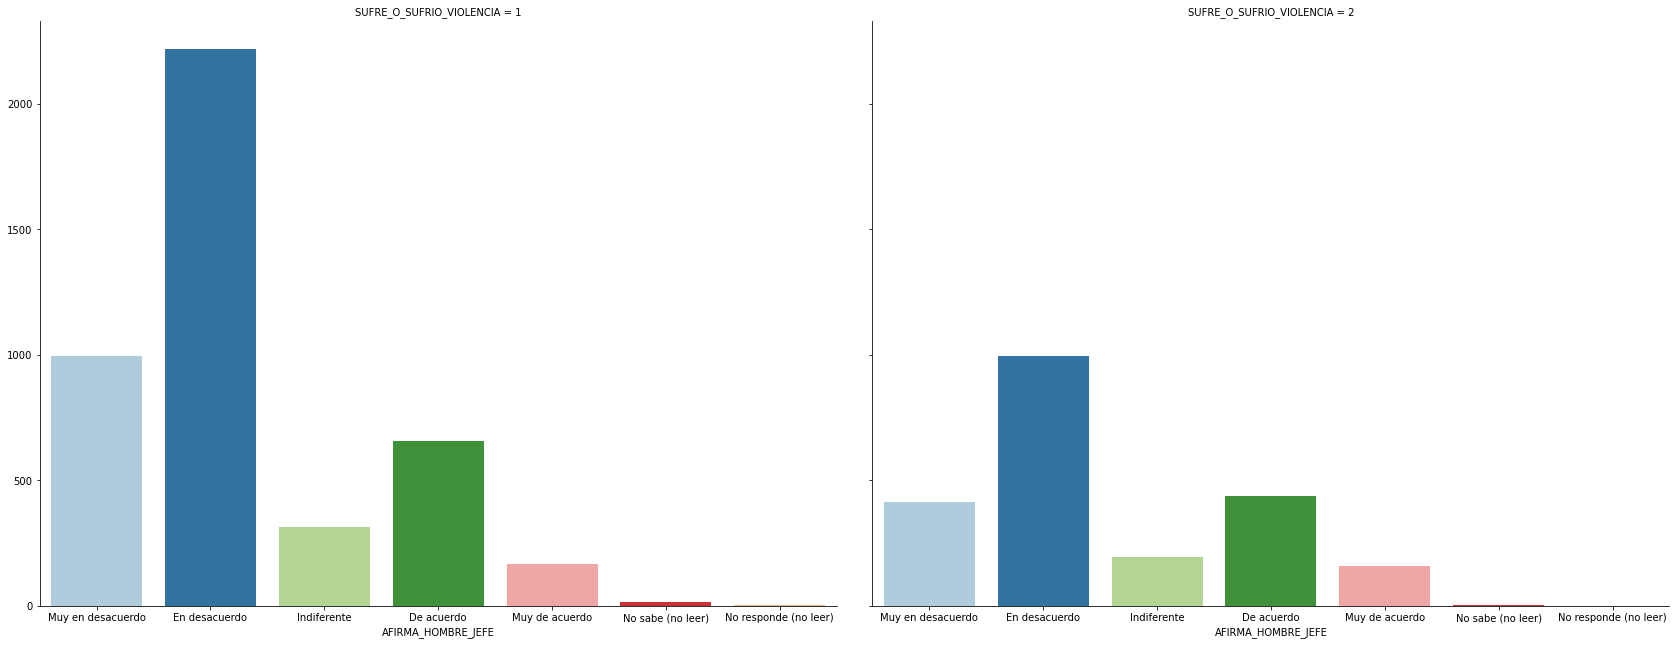

In [25]:
ax = sns.catplot(x='AFIRMA_HOMBRE_JEFE', col = 'SUFRE_O_SUFRIO_VIOLENCIA', data= data_violencia, kind = 'count', palette = sns.color_palette("Paired", 9))
ax.fig.set_figwidth(25)
ax.fig.set_figheight(10)
ax.set(ylabel='')
ax.set_xticklabels(['Muy en desacuerdo', 'En desacuerdo', 'Indiferente', 'De acuerdo', 'Muy de acuerdo', 'No sabe (no leer)','No responde (no leer)'])
plt.show()

En este caso tambien se puede visualizar la predominancia en el pensar de la mayoria de las mujeres en que el hombre no debe responsabilizarse de los gastos de  la familia en el hogar.

Haciendo un contraste en cuanto al rango etario se puede apreciar que mientras la mujer tiene mas edad, estas, estan mas de acuerdo con que el hombre debe responsabilizarse con los los gastos de la familia, esto puede deberse al pensamiento diferente en cuanto a epocas.

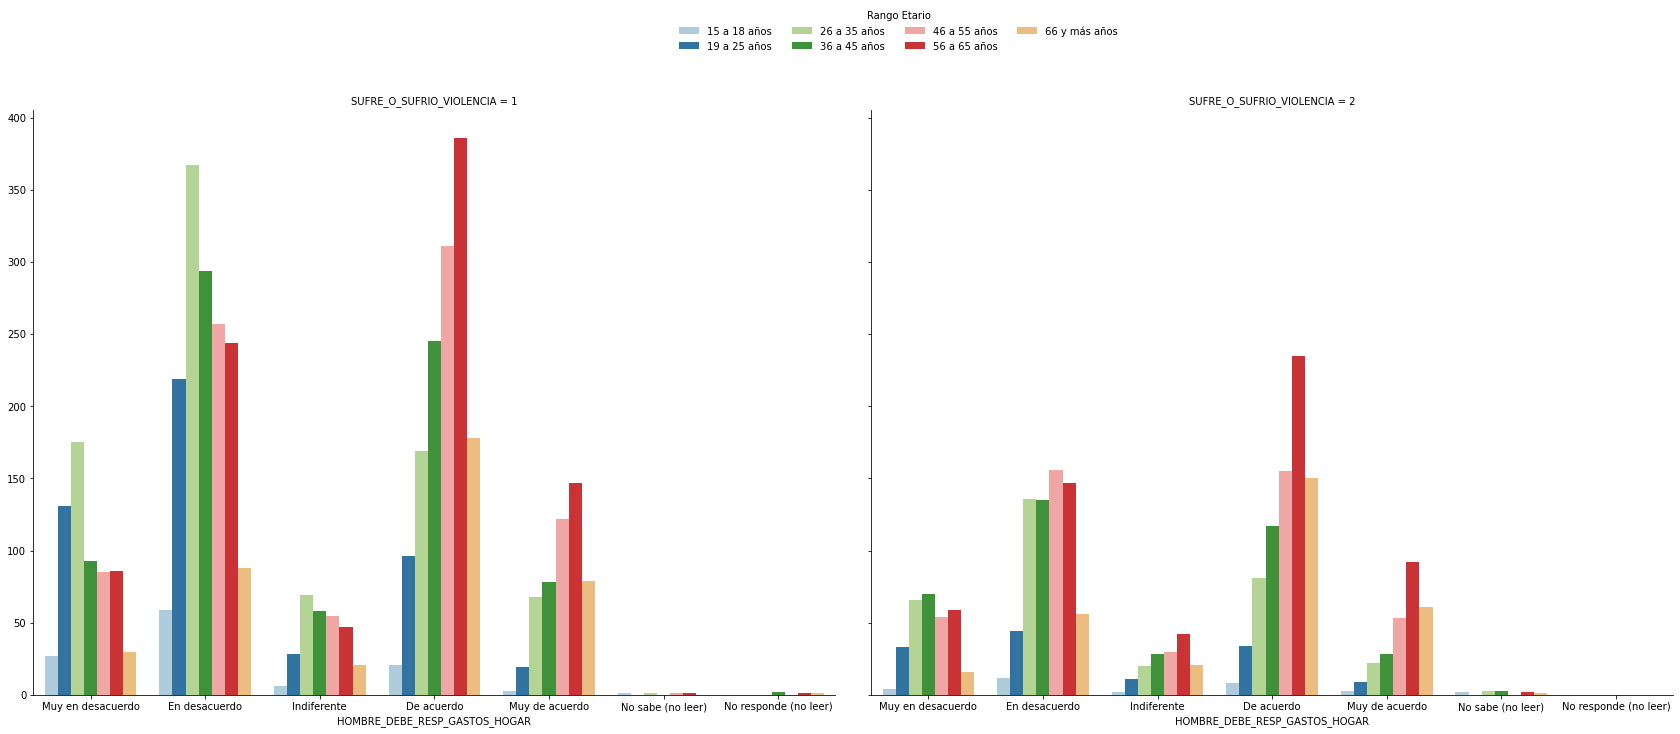

In [26]:
ax = sns.catplot(x='HOMBRE_DEBE_RESP_GASTOS_HOGAR',  hue = 'RANGO_ETARIO', col = 'SUFRE_O_SUFRIO_VIOLENCIA', data= data_violencia, kind = 'count', palette = sns.color_palette("Paired", 9))
ax.fig.set_figwidth(28)
ax.fig.set_figheight(10)
ax.set(ylabel='')
ax.set_xticklabels(['Muy en desacuerdo', 'En desacuerdo', 'Indiferente', 'De acuerdo', 'Muy de acuerdo', 'No sabe (no leer)','No responde (no leer)'])

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title= 'Rango Etario', frameon=False)
ax.set(ylabel='')
for t, l in zip(ax._legend.texts, ['15 a 18 años', '19 a 25 años','26 a 35 años','36 a 45 años','46 a 55 años','56 a 65 años','66 y más años']):
    t.set_text(l)

En este grafico se puede apreciar que la mayoria de las mujeres ya sea que sufran o no violencia piensan que deberian participar de una actividad social, aunque no tenga la aprobación de su esposo/pareja, aunque tambien se da el caso en que aun existe cierta cantidad de mujeres que estan en desacuerdo con este planteamiento

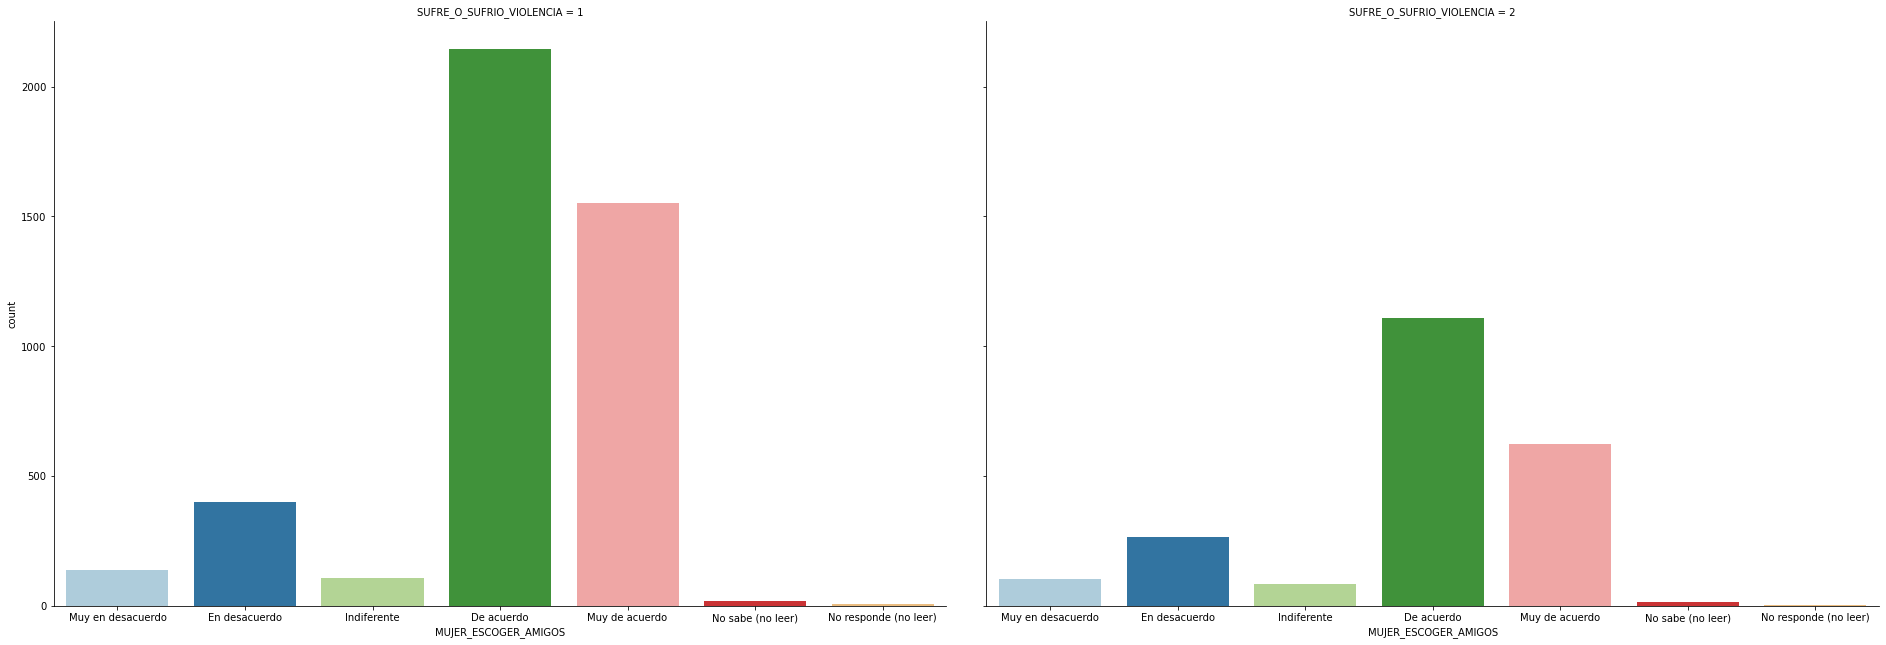

In [27]:
ax = sns.catplot(x='MUJER_ESCOGER_AMIGOS', col = 'SUFRE_O_SUFRIO_VIOLENCIA', data= data_violencia, kind = 'count', palette = sns.color_palette("Paired", 9))
ax.fig.set_figwidth(28)
ax.fig.set_figheight(10)
ax.set_xticklabels(['Muy en desacuerdo', 'En desacuerdo', 'Indiferente', 'De acuerdo', 'Muy de acuerdo', 'No sabe (no leer)','No responde (no leer)'])
plt.show()

### Construcción del Modelo de clusterización

Como se ha podido apreciar durante la limpieza y análisis de los datos, el data set principal (Encuestas VIF) contiene en su mayoria variables categoricas por lo cual en esta ocación se utilizará K-Modes el cual sirve para realizar clusterización para variables categoricas

1) Primero obtendremos todas las variables necesarias para crear el módelo.

In [28]:
data_model = data_vif.loc[:, ~data_vif.columns.isin(['EDAD', 'NUMERO_DE_HIJOS', 'MESES_SIN_TRABAJO', 'MESES_PAREJA_ACTUAL', 'MESES_EX_PAREJA','MESES_CONVIVENCIA_EX_PAREJA'])]
data_model.head()

,NIVEL_EDUCACION,OCUPACION,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VIOLENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,...,NO_MANEJO_DINERO,PROHIBE_TRABAJAR,TOMADO_SU_DINERO,ENDEUDADO_CONTRA_VOLUNTAD,ABUSOS_SEXUAL_FAMI,RANGO_ETARIO,GRUPO_SOCIOECONOMICO,PERSONAS_EN_HOGAR,ADULTOS_EN_HOGAR,AGRESION
0,6.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,6.0,6.0,6.0,2.0,4.0,3.0,7.0,7.0,1.0
1,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,2.0,1.0
2,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,6.0,6.0,6.0,1.0,2.0,3.0,2.0,2.0,9.0
3,11.0,8.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,6.0,6.0,6.0,1.0,4.0,1.0,2.0,2.0,9.0
4,8.0,10.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,1.0


In [29]:
cols = ['NIVEL_EDUCACION', 'OCUPACION', 'VIOLENCIA_PUBLICA',
       'VIOLENCIA_PUBLICA_NINEZ', 'VIOLENCIA_PUBLICA_VIDA',
       'VIOLENCIA_LABORAL_ANIO', 'VIOLENCIA_LABORAL_NINEZ',
       'VIOLENCIA_LABORAL_VIDA', 'VIOLENCIA_EDUCATIVO_ANIO',
       'VIOLENCIA_EDUCATIVO_NINEZ', 'VIOLENCIA_EDUCATIVO_VIDA',
       'VIOLENCIA_PSICOLOGICA_LEVE_ANIO', 'VIOLENCIA_PSICOLOGICA_GRAVE_ANIO',
       'VIOLENCIA_PSICOLOGICA_GENERAL_ANIO', 'VIOLENCIA_FISICA_LEVE_ANIO',
       'VIOLENCIA_FISICA_GRAVE_ANIO', 'VIOLENCIA_FISICA_GENERAL_ANIO',
       'VIOLENCIA_SEXUAL_ANIO', 'VIOLENCIA_SEXUAL_VIDA',
       'VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO',
       'VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA', 'VIOLENCIA_ECONOMICA',
       'DELITOS_SEXUALES_NINEZ', 'VIOLENCIA_ADULTEZ', 'DEPENDENCIA_ECONOMICA',
       'TIPOLOGIA_RED_APOYO', 'TIEMPO_PAREJA_ACT', 'EDAD_PAREJA_ACT',
       'ESTUDIOS_PAREJA_ACT', 'REG_REC', 'ESTADO_CIVIL', 'CONVIVE_CON_PAREJA',
       'NIVEL_EDUC', 'TUVO_ALGUN_TRABAJO_REMUNERADO', 'ACTUALMENTE_ESTUDIA',
       'SEXUALIDAD', 'RELACION_CON_EL_SOSTENEDOR', 'SEXO_DE_LA_PAREJA',
       'EDAD_DE_LA_PAREJA_ACTUAL', 'NACIONALIDAD',
       'SU_PAREJA_A_SIDO_VIOLENTA_CON_OTROS',
       'SU_PAREJA_SUFRIO_ABUSO_EN_SU_INFANCIA_PADRES',
       'FUE_TESTIGO_DE_VIOLENCIA_PADRES', 'SU_PAREJA_BEBE',
       'SEXO_LA_PAREJA_ANTERIOR', 'NACIONALIDAD_DE_LA_PAREJA',
       'CONVIVIO_CON_SU_PAREJA_ANTERIOR', 'NIV_EDUC_PAJERA_ANT',
       'AGRESION_OTRAS_PERSONAS_PAREJA_ANT', 'AGRESION_PADRES_PAREJA_ANT',
       'PRESENCIO_AGRESION_MADRE_PAREJA_ANT',
       'CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT',
       'GENERA_INGRESOS_PROPIOS', 'APOYO_ECONONOMICO',
       'DISPONE_DINERO_GASTOS_PERSONALES', 'VIVIENDA_A_NOMBRE_ELLA',
       'VIVIENDA_A_NOMBRE_PAREJA', 'VIVIENDA_A_NOMBRE_PAREJA_ANT',
       'VIVIENDA_A_NOMBRE_NO_SABE', 'VIVIENDA_A_NOMBRE_NO_RESPONDE',
       'DECISION_QUIEN_TRABAJA', 'DECISION_QUIEN_ESTUDIA',
       'DECISION_DISPONE_DINERO', 'AFIRMA_HOMBRE_JEFE',
       'HOMBRE_DEBE_RESP_GASTOS_HOGAR', 'MUJER_ACARGO_HIJOS',
       'MUJER_REALIZAR_QUEHACERES', 'MUJER_NO_CONTRA_OP',
       'MUJER_PART_SINAPROB', 'MUJER_ESCOGER_AMIGOS', 'VEST_APROBADA',
       'RELACIONES_OBLIGADA', 'VESTIRSE_X_NO_ACOSO', 'MALTRATO_X_BIEN_FAMILIA',
       'MALTRATO_SE_RESUELVE_EN_CASA', 'MALTRATO_X_INFIDELIDAD',
       'FREC_COMU_FAM', 'FREC_COMU_AMIGOS', 'FREC_COMU_VECINOS',
       'FREC_COMU_RELIGIOSA', 'FREC_COMU_OTROS', 'EL_NIEGA_DINERO_HOGAR',
       'REPROCHA_VIVIR_DE_SU_DINERO', 'NO_DECIDIR_GASTOS', 'NO_MANEJO_DINERO',
       'PROHIBE_TRABAJAR', 'TOMADO_SU_DINERO', 'ENDEUDADO_CONTRA_VOLUNTAD',
       'ABUSOS_SEXUAL_FAMI', 'RANGO_ETARIO', 'GRUPO_SOCIOECONOMICO',
       'PERSONAS_EN_HOGAR', 'ADULTOS_EN_HOGAR', 'AGRESION']

data_model[cols] = data_model[cols].astype("category")
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 94 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   NIVEL_EDUCACION                                6570 non-null   category
 1   OCUPACION                                      6570 non-null   category
 2   VIOLENCIA_PUBLICA                              6570 non-null   category
 3   VIOLENCIA_PUBLICA_NINEZ                        6570 non-null   category
 4   VIOLENCIA_PUBLICA_VIDA                         6570 non-null   category
 5   VIOLENCIA_LABORAL_ANIO                         6570 non-null   category
 6   VIOLENCIA_LABORAL_NINEZ                        6570 non-null   category
 7   VIOLENCIA_LABORAL_VIDA                         6570 non-null   category
 8   VIOLENCIA_EDUCATIVO_ANIO                       6570 non-null   category
 9   VIOLENCIA_EDUCATIVO_NINEZ                

C:\Users\raaguilera\AppData\Local\Temp\ipykernel_15376\511517362.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model[cols] = data_model[cols].astype("category")


In [30]:
kmodes_model = KModes(n_clusters = 2, init = "Cao", n_init = 1)
fitClusters_cao = kmodes_model.fit_predict(data_model)

clusterCentroidsDf = pd.DataFrame(kmodes_model.cluster_centroids_)
clusterCentroidsDf.columns = data_model.columns
display(clusterCentroidsDf)

,NIVEL_EDUCACION,OCUPACION,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VIOLENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,...,NO_MANEJO_DINERO,PROHIBE_TRABAJAR,TOMADO_SU_DINERO,ENDEUDADO_CONTRA_VOLUNTAD,ABUSOS_SEXUAL_FAMI,RANGO_ETARIO,GRUPO_SOCIOECONOMICO,PERSONAS_EN_HOGAR,ADULTOS_EN_HOGAR,AGRESION
0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,6.0,3.0,4.0,2.0,9.0
1,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,6.0,6.0,6.0,6.0,2.0,6.0,3.0,3.0,2.0,9.0


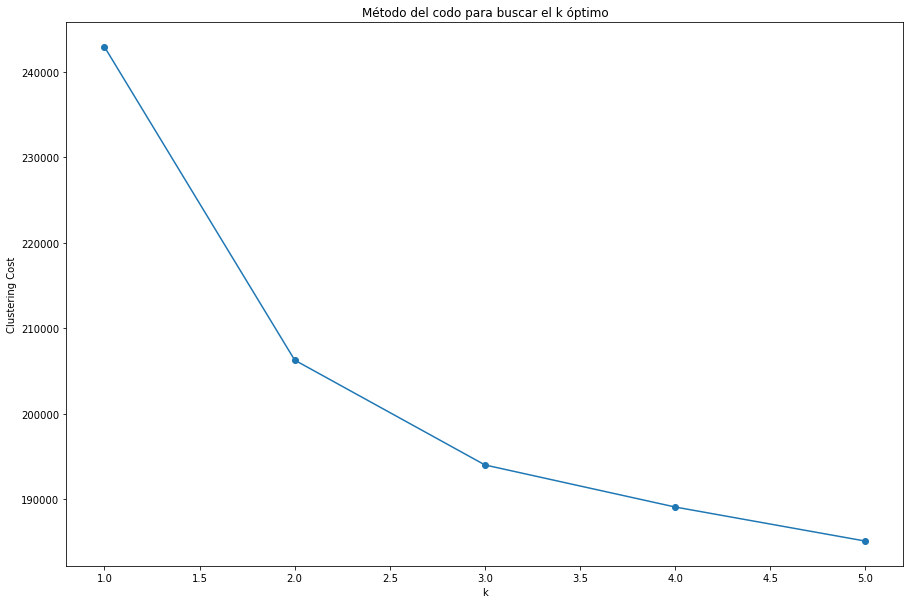

In [31]:
cost = []
for num_clusters in range(1,6):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 20)
    kmode.fit_predict(data_model)
    cost.append(kmode.cost_)

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(range(1,6),cost,marker = 'o',linestyle = 'solid')
plt.xlabel('k')
plt.ylabel('Clustering Cost')
plt.title('Método del codo para buscar el k óptimo')
plt.show()

Se puede visualizar que se empieza a perder generalización al utilizar muchos centroides, en este caso podemos observar que pasar de 3 a 4 centroides no existe una ganancia significativa por lo cual la dicisión en esta ocación será utilizar 3 clusters.

In [32]:
kmodes_model = KModes(n_clusters= 3, init = "Cao", n_init =20)
fitClusters_cao = kmodes_model.fit_predict(data_model)

clusterCentroidsDf = pd.DataFrame(kmodes_model.cluster_centroids_)
clusterCentroidsDf.columns = data_model.columns
display(clusterCentroidsDf)

,NIVEL_EDUCACION,OCUPACION,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VIOLENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,...,NO_MANEJO_DINERO,PROHIBE_TRABAJAR,TOMADO_SU_DINERO,ENDEUDADO_CONTRA_VOLUNTAD,ABUSOS_SEXUAL_FAMI,RANGO_ETARIO,GRUPO_SOCIOECONOMICO,PERSONAS_EN_HOGAR,ADULTOS_EN_HOGAR,AGRESION
0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,6.0,3.0,4.0,2.0,9.0
1,6.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,6.0,6.0,6.0,6.0,2.0,6.0,3.0,3.0,2.0,9.0
2,6.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,9.0


Una vez creado la clusterización asignamos a cada registro su correspondiente cluster

In [33]:
data_vif['clusters'] = fitClusters_cao

In [34]:
data_vif.columns.values

array(['NIVEL_EDUCACION', 'OCUPACION', 'VIOLENCIA_PUBLICA',
       'VIOLENCIA_PUBLICA_NINEZ', 'VIOLENCIA_PUBLICA_VIDA',
       'VIOLENCIA_LABORAL_ANIO', 'VIOLENCIA_LABORAL_NINEZ',
       'VIOLENCIA_LABORAL_VIDA', 'VIOLENCIA_EDUCATIVO_ANIO',
       'VIOLENCIA_EDUCATIVO_NINEZ', 'VIOLENCIA_EDUCATIVO_VIDA',
       'VIOLENCIA_PSICOLOGICA_LEVE_ANIO',
       'VIOLENCIA_PSICOLOGICA_GRAVE_ANIO',
       'VIOLENCIA_PSICOLOGICA_GENERAL_ANIO', 'VIOLENCIA_FISICA_LEVE_ANIO',
       'VIOLENCIA_FISICA_GRAVE_ANIO', 'VIOLENCIA_FISICA_GENERAL_ANIO',
       'VIOLENCIA_SEXUAL_ANIO', 'VIOLENCIA_SEXUAL_VIDA',
       'VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO',
       'VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA', 'VIOLENCIA_ECONOMICA',
       'DELITOS_SEXUALES_NINEZ', 'VIOLENCIA_ADULTEZ',
       'DEPENDENCIA_ECONOMICA', 'TIPOLOGIA_RED_APOYO',
       'TIEMPO_PAREJA_ACT', 'EDAD_PAREJA_ACT', 'ESTUDIOS_PAREJA_ACT',
       'REG_REC', 'EDAD', 'ESTADO_CIVIL', 'CONVIVE_CON_PAREJA',
       'NUMERO_DE_HIJOS', 'NIVEL_EDUC', 'TUVO_ALGUN

- Cluster 0: Se encuentran las personas que cuentan con estudios secundarios completa en su mayoria.
- Cluster 1: Se encuentran las personas que cuentan con estudios secundarios y/o media basica incompleta.
- Cluster 2: Presenta la mayor cantidad de personas con estudio superiores.

In [35]:
display(data_vif.query("clusters==0")['NIVEL_EDUCACION'].value_counts("%"))
display(data_vif.query("clusters==1")['NIVEL_EDUCACION'].value_counts("%"))
display(data_vif.query("clusters==2")['NIVEL_EDUCACION'].value_counts("%"))

6.0     0.332164
5.0     0.134842
10.0    0.125279
4.0     0.117628
8.0     0.114122
3.0     0.109340
9.0     0.027096
7.0     0.019445
11.0    0.009882
1.0     0.009882
2.0     0.000319
Name: NIVEL_EDUCACION, dtype: float64

6.0     0.296778
3.0     0.153846
8.0     0.128378
10.0    0.120062
5.0     0.112786
4.0     0.107588
7.0     0.028586
9.0     0.027027
1.0     0.017672
11.0    0.007277
Name: NIVEL_EDUCACION, dtype: float64

6.0     0.348575
10.0    0.168986
8.0     0.159046
5.0     0.098078
4.0     0.068920
3.0     0.055666
9.0     0.047051
11.0    0.023857
7.0     0.021869
1.0     0.007952
Name: NIVEL_EDUCACION, dtype: float64

- Cluster 0: Posee un nivel socioeconomico medio/bajo tendiendo a medio.
- Cluster 1: Es en donde se encuentran las personas con un nivel socioeconomico mas bajo del grupo
- Cluster 2: Se encuentran las pesonas con un nivel socioeconomico mayor en comparación con los otros dos clusters.

In [36]:
display(data_vif.query("clusters==0")['GRUPO_SOCIOECONOMICO'].value_counts("%"))
display(data_vif.query("clusters==1")['GRUPO_SOCIOECONOMICO'].value_counts("%"))
display(data_vif.query("clusters==2")['GRUPO_SOCIOECONOMICO'].value_counts("%"))

3.0    0.540006
2.0    0.383806
1.0    0.076187
Name: GRUPO_SOCIOECONOMICO, dtype: float64

3.0    0.606029
2.0    0.335759
1.0    0.058212
Name: GRUPO_SOCIOECONOMICO, dtype: float64

3.0    0.455931
2.0    0.432074
1.0    0.111995
Name: GRUPO_SOCIOECONOMICO, dtype: float64

- Cluster 0: Predominan las personas adultas
- Cluster 1: Tambien hay personas adultas pero en un grado enor que el cluster, este cluster contiene personas de todas las edades.
- Cluster 2: Se encuentran personas jovenes

In [37]:
display(data_vif.query("clusters==0")['RANGO_ETARIO'].value_counts("%"))
display(data_vif.query("clusters==1")['RANGO_ETARIO'].value_counts("%"))
display(data_vif.query("clusters==2")['RANGO_ETARIO'].value_counts("%"))

6.0    0.280523
5.0    0.237807
4.0    0.180427
3.0    0.139624
7.0    0.109659
2.0    0.043354
1.0    0.008607
Name: RANGO_ETARIO, dtype: float64

6.0    0.247401
7.0    0.165281
5.0    0.164241
3.0    0.134615
4.0    0.130457
2.0    0.114865
1.0    0.043139
Name: RANGO_ETARIO, dtype: float64

3.0    0.318091
4.0    0.221339
2.0    0.176938
5.0    0.143804
6.0    0.088138
7.0    0.026508
1.0    0.025182
Name: RANGO_ETARIO, dtype: float64

- Cluster 0: Predominan las personas casadas casi en su totalidad.
- Cluster 1: Predomina las personas que estas solteras y viudas/os.
- Cluster 2: Se encuentran las personas solteras y diviorsiado/as.

In [38]:
display(data_vif.query("clusters==0")['ESTADO_CIVIL'].value_counts("%"))
display(data_vif.query("clusters==1")['ESTADO_CIVIL'].value_counts("%"))
display(data_vif.query("clusters==2")['ESTADO_CIVIL'].value_counts("%"))   

1.0    0.704495
7.0    0.241951
5.0    0.018808
4.0    0.014664
6.0    0.014345
2.0    0.004782
8.0    0.000319
3.0    0.000319
9.0    0.000319
Name: ESTADO_CIVIL, dtype: float64

7.0    0.544699
6.0    0.184511
4.0    0.119543
5.0    0.100312
1.0    0.045218
3.0    0.004678
2.0    0.000520
8.0    0.000520
Name: ESTADO_CIVIL, dtype: float64

7.0    0.611663
1.0    0.236581
5.0    0.061630
4.0    0.053015
6.0    0.025845
2.0    0.008615
3.0    0.001988
8.0    0.000663
Name: ESTADO_CIVIL, dtype: float64

- Cluster 0: Es la que posee menor violencia publica
- Cluster 1: Varias mujeres ha sufrido de violencia publica
- Cluster 2: En este cluster se encuentran las mujeres que más violencia pública ha sufrido

In [39]:
display(data_vif.query("clusters==0")['VIOLENCIA_PUBLICA'].value_counts("%"))
display(data_vif.query("clusters==1")['VIOLENCIA_PUBLICA'].value_counts("%"))
display(data_vif.query("clusters==2")['VIOLENCIA_PUBLICA'].value_counts("%"))   

2.0    0.940708
1.0    0.059292
Name: VIOLENCIA_PUBLICA, dtype: float64

2.0    0.85447
1.0    0.14553
Name: VIOLENCIA_PUBLICA, dtype: float64

2.0    0.803844
1.0    0.196156
Name: VIOLENCIA_PUBLICA, dtype: float64